<a href="https://colab.research.google.com/github/ahmedgama22/Portfolio-Projects/blob/main/E_Commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'unlock-profits-with-e-commerce-sales-data:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F2699295%2F4642886%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240508%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240508T165546Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D79da830476e00e0ad95a3bb16ba10e9fcdafb65ddb793596ffef93df6a0348600f547deb4d236b5b3653aa1a921e7392617440ee781253d3e8a0acb4edc0b5f818b852b9bf95315e976e5f90d689595d2448b719d0d1d12eeb7927ba3d872c9e34e53fabc53e86350f8209308c04ac9d2926748d5f03d0fc100ab3dc36c45ebba1bb6cb5724a4470fd6062752547191f8aadb582b0ef9bf13883bc669bbe54275e89b85859f4f0bee21ed363e2f17afae2ba0486d4ab40dbda023b24dd798c0de86c417d270c9dae59fff233644cc351ce474a85e0a052003864f5fd9e0f6a336007c2b006119a69b1258436d841491d6a7a6f4dd2c93ce153805f528561357e'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


# About the data:
This dataset provides an in-depth look at the profitability of e-commerce sales. It contains data on a variety of sales channels, including Shiprocket and INCREFF, as well as financial information on related expenses and profits. The columns contain data such as SKU codes, design numbers, stock levels, product categories, sizes and colors. In addition to this we have included the MRPs across Amazon MRP , Amazon FBA MRP along with other key parameters like amount paid by customer for the purchase , rate per piece for every individual transaction Also we have added transactional parameters like Date of sale months category fulfilledby B2b Status Qty Currency Gross amt . This is a must-have dataset for anyone trying to uncover the profitability of e-commerce sales in today's marketplace

# Importing Packages:

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Cloud Warehouse Compersion Chart.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/May-2022.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/P  L March 2021.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/International sale Report.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Expense IIGF.csv
/kaggle/input/unlock-profits-with-e-commerce-sales-data/Sale Report.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading the data:

In [ ]:
df=pd.read_csv('/kaggle/input/unlock-profits-with-e-commerce-sales-data/Amazon Sale Report.csv')

In [ ]:
df

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


# Processing and Cleaning the data:

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [ ]:
df.shape

(128975, 24)

In [ ]:
df.head(10)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,...,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,...,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,...,NaN,NaN,HYDERABAD,TELANGANA,500008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,NaN
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,...,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,NaN,False,NaN,NaN


In [ ]:
df.tail(20)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128955,128955,407-2378184-3732358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET342,SET342-KR-NP-N-M,Set,...,INR,850.0,HYDERABAD,TELANGANA,500072.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128956,128956,403-0816822-3188305,05-31-22,Shipped,Amazon,Amazon.in,Expedited,NW032,NW032-ST-CP-XXXL,Set,...,INR,992.0,CHENNAI,TAMIL NADU,600042.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128957,128957,402-8261465-0622733,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,...,INR,1349.0,RANCHI,JHARKHAND,834002.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128958,128958,408-9513596-4393945,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET058,SET058-KR-NP-L,Set,...,NaN,NaN,Bengaluru,KARNATAKA,560037.0,IN,NaN,False,NaN,False
128959,128959,403-9813694-4657102,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3781,JNE3781-KR-M,kurta,...,INR,432.0,NEW DELHI,DELHI,110043.0,IN,NaN,False,NaN,False
128960,128960,402-0468123-8401109,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0306,J0306-DR-XS,Western Dress,...,INR,791.0,FARIDABAD,HARYANA,121002.0,IN,NaN,False,NaN,False
128961,128961,402-0082204-6323568,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-A-XL,Western Dress,...,INR,771.0,Junagadh,Gujarat,362001.0,IN,NaN,False,NaN,False
128962,128962,408-9803724-6565965,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,MEN5024,MEN5024-KR-L,kurta,...,INR,665.0,MUMBAI,MAHARASHTRA,400056.0,IN,NaN,False,NaN,False
128963,128963,404-5963451-7335564,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0308,J0308-DR-XS,Western Dress,...,INR,665.0,KALAMASSERY,KERALA,682021.0,IN,NaN,False,NaN,False
128964,128964,404-2225394-8024308,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0152,J0152-DR-S,Western Dress,...,INR,899.0,KALAMASSERY,KERALA,682021.0,IN,NaN,False,NaN,False


In [ ]:
# checking if there is any duplicate in the data:

df.duplicated().sum()

0

In [ ]:
# check for unknown values in the data:

df.isna().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [ ]:
# Dropping columns from the dataframe:

df=df.drop(columns=['Unnamed: 22','fulfilled-by','Sales Channel ','currency','ship-country'],axis=1)

In [ ]:
# check for dataframe columns:

df

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,517.00,HYDERABAD,TELANGANA,500013.0,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,690.00,HYDERABAD,TELANGANA,500049.0,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,1199.00,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False


## Filling unknown values:

In [ ]:
df['Courier Status']=df['Courier Status'].fillna('unknown')

In [ ]:
df['Amount']=df['Amount'].fillna('0')

In [ ]:
df['ship-city'].fillna('unknown',inplace=True)

In [ ]:
df['ship-state'].fillna('unknown',inplace=True)

In [ ]:
df['ship-postal-code'].fillna('unknown',inplace=True)

In [ ]:
df['promotion-ids'].fillna('no_promotion',inplace=True)

In [ ]:
# checking the dataframe after filling unknown values:

df.head(30)

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,647.62,MUMBAI,MAHARASHTRA,400081.0,no_promotion,False
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,406.0,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,False
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,True
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,no_promotion,False
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,574.0,CHENNAI,TAMIL NADU,600073.0,no_promotion,False
5,5,404-1490984-4578765,04-30-22,Shipped,Amazon,Expedited,SET264,SET264-KR-NP-XL,Set,XL,B08YN7XDSG,Shipped,1,824.0,GHAZIABAD,UTTAR PRADESH,201102.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
6,6,408-5748499-6859555,04-30-22,Shipped,Amazon,Expedited,J0095,J0095-SET-L,Set,L,B08CMHNWBN,Shipped,1,653.0,CHANDIGARH,CHANDIGARH,160036.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
7,7,406-7807733-3785945,04-30-22,Shipped - Delivered to Buyer,Merchant,Standard,JNE3405,JNE3405-KR-S,kurta,S,B081WX4G4Q,Shipped,1,399.0,HYDERABAD,TELANGANA,500032.0,Amazon PLCC Free-Financing Universal Merchant ...,False
8,8,407-5443024-5233168,04-30-22,Cancelled,Amazon,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,B08L91ZZXN,Cancelled,0,0,HYDERABAD,TELANGANA,500008.0,IN Core Free Shipping 2015/04/08 23-48-5-108,False
9,9,402-4393761-0311520,04-30-22,Shipped,Amazon,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,B08B3XF5MH,Shipped,1,363.0,Chennai,TAMIL NADU,600041.0,no_promotion,False


In [ ]:
# Currency Exchange from INR to US Dollar:

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
exchange_rate= 0.012
df['Amount']=df['Amount'].apply(lambda x: x * exchange_rate)

In [ ]:
# Replacing the values from (True,False) to (business,customer):

df['B2B'].replace(to_replace=[True,False],value=['business','customer'],inplace=True)

In [ ]:
# Converting the data type to datetime type:

df['Date'] = pd.to_datetime(df['Date'])
df['month']=df['Date'].dt.month
df['month'].unique()


array([4, 3, 5, 6], dtype=int32)

In [ ]:
# naming the months:

months= ['March','April','May','June']
df['month'].replace([3,4,5,6],months,inplace=True)

In [ ]:
df['Date'].min()

Timestamp('2022-03-31 00:00:00')

In [ ]:
df['Date'].max()

Timestamp('2022-06-29 00:00:00')

In [ ]:
# checking the dataframe:

df.head()

,index,Order ID,Date,Status,Fulfilment,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,B2B,month
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,unknown,0,7.77144,MUMBAI,MAHARASHTRA,400081.0,no_promotion,customer,April
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,4.87200,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,customer,April
2,2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,3.94800,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,business,April
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,unknown,0,9.03996,PUDUCHERRY,PUDUCHERRY,605008.0,no_promotion,customer,April
4,4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,6.88800,CHENNAI,TAMIL NADU,600073.0,no_promotion,customer,April


In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'promotion-ids', 'B2B', 'month'],
      dtype='object')

In [ ]:
# converting the datatype to numeric:

df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')

In [ ]:
# Grouping the dataframe by sum of  ('Category')['Amount'] in descending order:

category_order = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).reset_index()

# Analysis and Visualization:

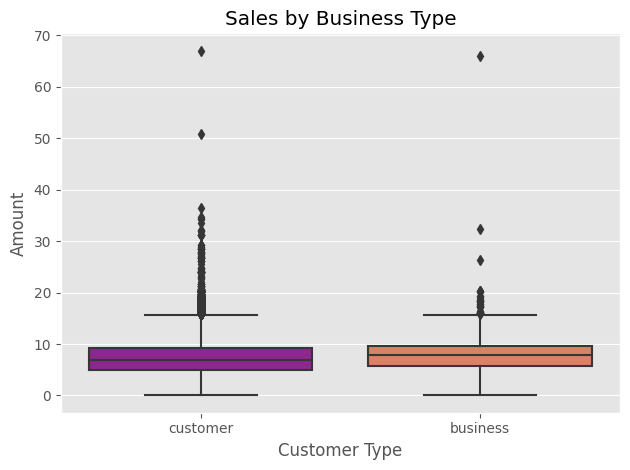

In [ ]:
# Business Type by Amount:

sns.boxplot(x='B2B', y='Amount', data=df, palette= 'plasma')
plt.title('Sales by Business Type')
plt.xlabel('Customer Type')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

## Sales of B to C is higher than B to B.

In [ ]:
df['Category'].unique()

array(['Set', 'kurta', 'Western Dress', 'Top', 'Ethnic Dress', 'Bottom',
       'Saree', 'Blouse', 'Dupatta'], dtype=object)

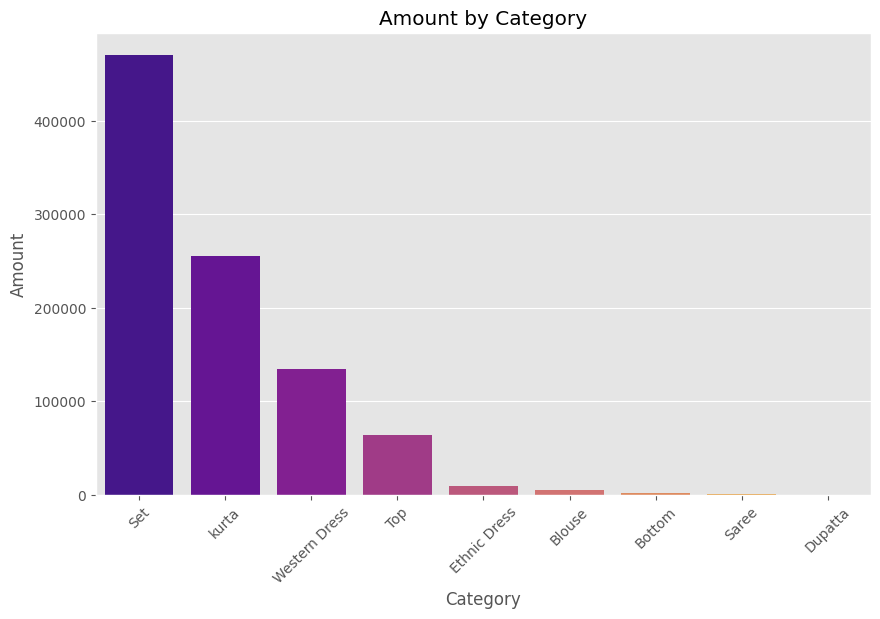

In [ ]:
# Amount by Category:

plt.figure(figsize=(10, 6))
sns.barplot(x='Category',y='Amount',data=category_order,palette='plasma')
plt.xlabel('Category')
plt.ylabel('Amount')
plt.title('Amount by Category')
plt.xticks(rotation=45)
plt.show()

## (Set) is the higher and (Dupatta) is the lowest.


In [ ]:
month_sum = df.groupby('month')['Amount'].sum().sort_values(ascending=False).reset_index()

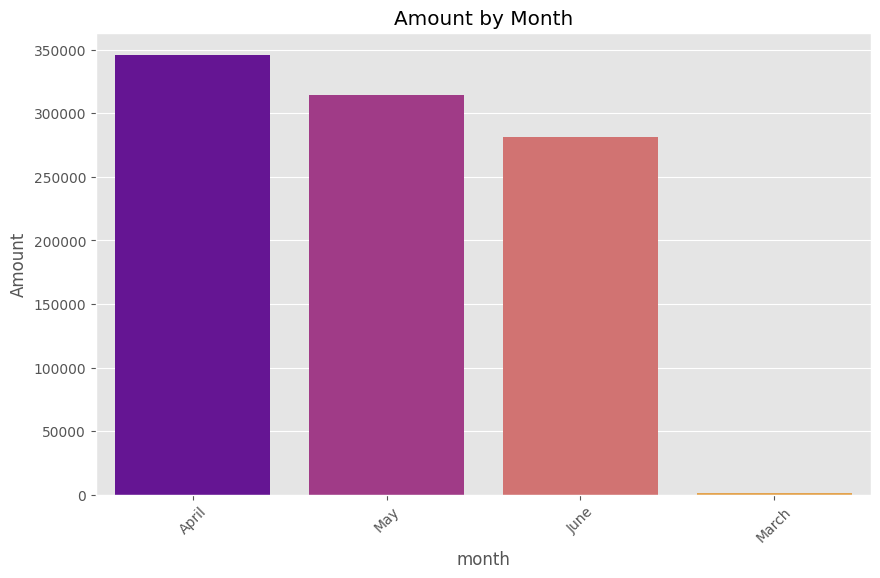

In [ ]:
# Amount by Month:

plt.figure(figsize=(10, 6))
sns.barplot(x='month',y='Amount',data=month_sum,palette='plasma')
plt.xlabel('month')
plt.ylabel('Amount')
plt.title('Amount by Month')
plt.xticks(rotation=45)
plt.show()

## April has the highest sales and March is the lowest.

In [ ]:
fulfilment_sum = df.groupby('Fulfilment')['Qty'].sum().sort_values(ascending=False).reset_index()


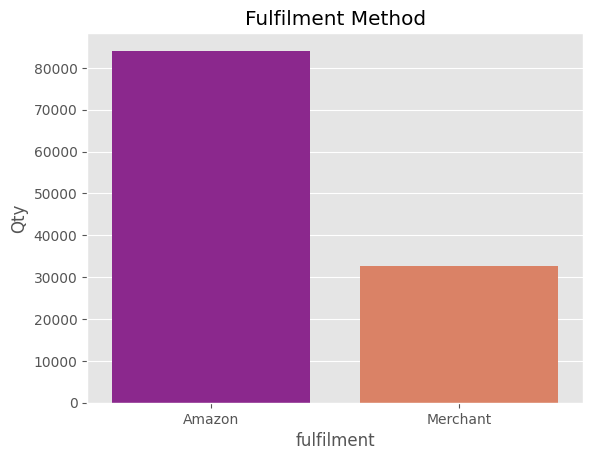

In [ ]:
# QTY by fulfilment method:

sns.barplot(x='Fulfilment',y='Qty',data=fulfilment_sum,palette='plasma')
plt.xlabel('fulfilment')
plt.ylabel('Qty')
plt.title('Fulfilment Method')
plt.show()

## QTY fulfiled by Amazon is higher than Merchant.

In [ ]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'promotion-ids', 'B2B', 'month'],
      dtype='object')

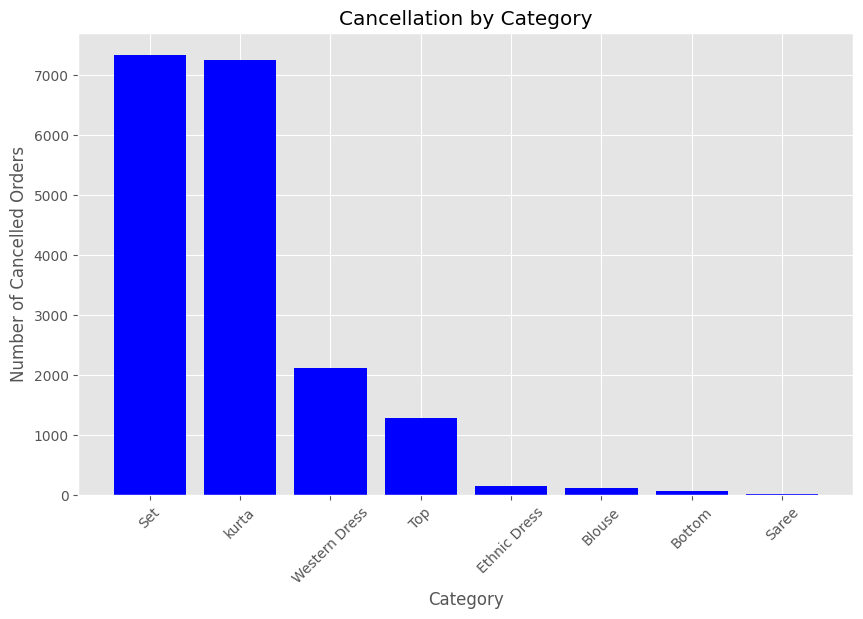

In [ ]:
# Cancelled Orders by Category:

cancelled_orders=df[df['Status']=='Cancelled']
cancelled_category=cancelled_orders.groupby('Category')['Qty'].count().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(cancelled_category['Category'], cancelled_category['Qty'], color='blue')
plt.title('Cancellation by Category')
plt.xlabel('Category')
plt.ylabel('Number of Cancelled Orders')
plt.xticks(rotation=45)
plt.show()

## Set has the highest cancellation orders the second one is Kurta and the lowest Saree.

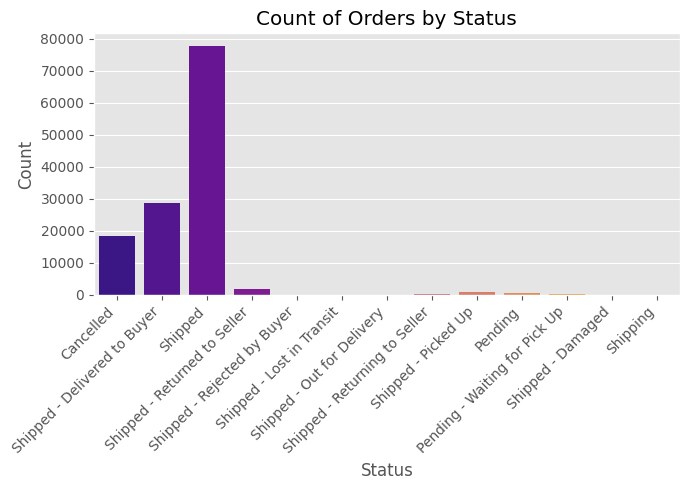

In [ ]:
# Count of orders by status:

plt.figure(figsize=(7, 5))
sns.countplot(x='Status', data=df, palette='plasma')
plt.title('Count of Orders by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Shipped orders is the highest the second one is shipped-delivered to buyer .


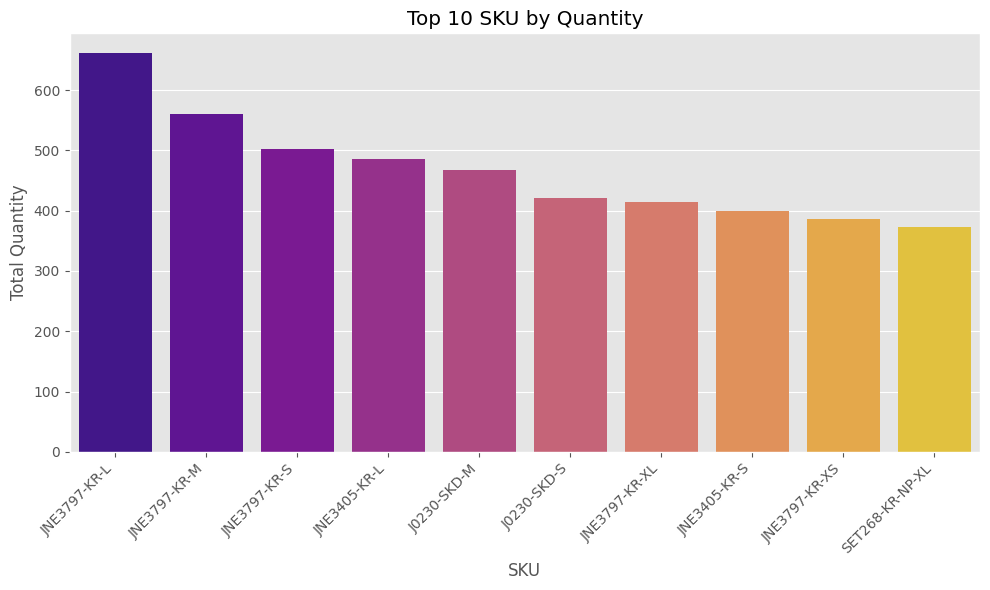

In [ ]:
# Top 10 SKUS by Quantity:

sku_totals = df.groupby('SKU')['Qty'].sum().reset_index()

top_skus = sku_totals.nlargest(10, 'Qty')

plt.figure(figsize=(10, 6))
sns.barplot(x='SKU', y='Qty', data=top_skus, palette='plasma')

plt.title('Top 10 SKU by Quantity')
plt.xlabel('SKU')
plt.ylabel('Total Quantity')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## this SKU(JNE3797-K-R-L) has the highest Quantity.

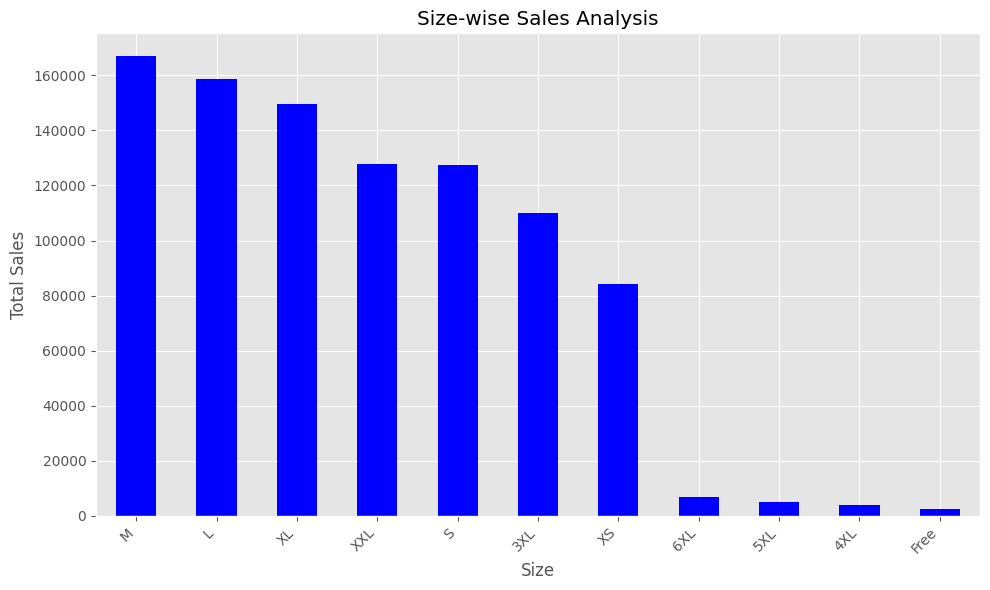

In [ ]:
# Size-wise sales Analysis:

size_sales = df.groupby('Size')['Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
size_sales.plot.bar(color='blue')
plt.title('Size-wise Sales Analysis')
plt.xlabel('Size')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## M size is the best seller free size is the lowest .

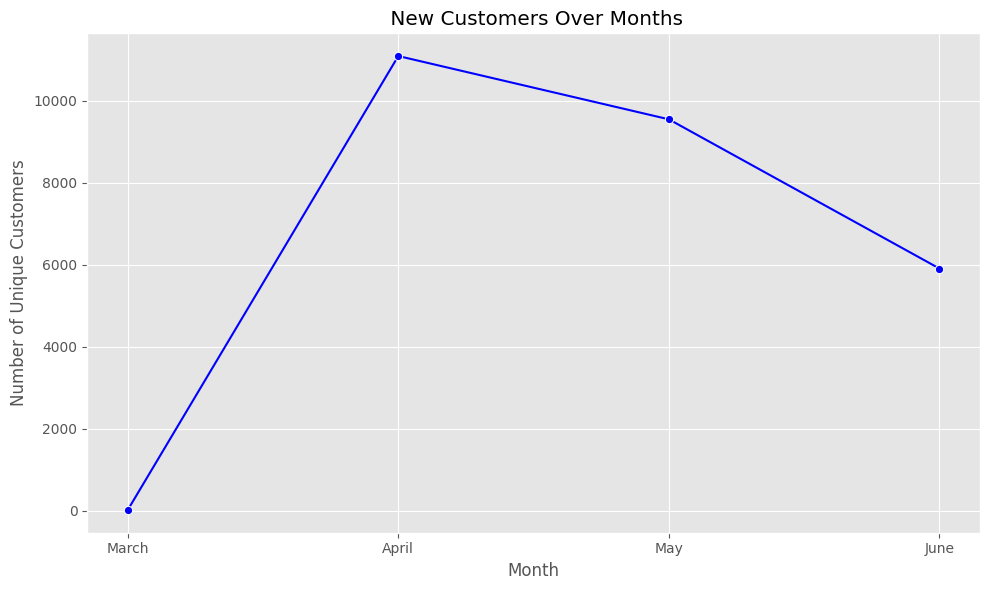

In [ ]:
# Number of new customers over month:

month_order = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February']

new_customers = df[df['Status'] == 'Shipped - Delivered to Buyer'].groupby('month')['Order ID'].nunique()

new_customers = new_customers.reindex(month_order)

plt.figure(figsize=(10, 6))
sns.lineplot(x=new_customers.index, y=new_customers.values, marker='o', color='blue')


plt.title(' New Customers Over Months')
plt.xlabel('Month')
plt.ylabel('Number of Unique Customers')

plt.tight_layout()
plt.show()

## April is the highest month that hase new customers and March is the lowest.

# Conclusion: Unveiling Insights into E-commerce Sales Trends

Our analysis of the E-commerce dataset has unveiled a plethora of insights into sales trends, customer behavior, and operational dynamics within the digital marketplace. These findings provide valuable intelligence for businesses seeking to optimize their strategies and capitalize on emerging opportunities.

1-B2C Outpaces B2B Sales: Our analysis reveals that B2C sales outstrip B2B transactions, underscoring the importance of catering to individual customers within the e-commerce ecosystem. Understanding the unique needs and preferences of B2C clientele can unlock new avenues for growth and revenue generation.

2-Product Performance Variation: The data highlights significant variations in product performance, with "Set" emerging as the top performer and "Dupatta" lagging behind. This underscores the importance of product assortment optimization to maximize sales potential.

3-Seasonal Sales Dynamics: April emerges as the peak month for sales activity, while March sees comparatively lower transaction volumes. Recognizing these seasonal fluctuations enables businesses to adjust inventory levels and marketing strategies accordingly.

4-Fulfillment Insights: Orders fulfilled by Amazon surpass those handled by merchants, indicating the importance of efficient fulfillment processes in driving customer satisfaction and loyalty.

5-Cancellation Patterns: "Set" and "Kurta" witness higher cancellation rates compared to "Saree," highlighting potential areas for improvement in product quality or customer service.

6-Order Fulfillment Channels: Shipped orders dominate the fulfillment landscape, followed by orders shipped and delivered to the buyer, emphasizing the significance of reliable shipping and delivery operations.

7-SKU Performance: SKU "JNE3797-K-R-L" emerges as the top performer in terms of quantity sold, showcasing the importance of SKU-level analysis in identifying best-selling products.

8-Size Preferences: M size emerges as the preferred size category among customers, while free size records lower sales volumes. Tailoring inventory to match customer preferences can enhance sales performance and customer satisfaction.

9-New Customer Acquisition: April sees the highest influx of new customers, presenting opportunities for businesses to implement targeted marketing strategies and expand their customer base.

In conclusion, these insights provide actionable intelligence for businesses operating in the e-commerce domain. By leveraging these findings, organizations can refine their product offerings, optimize fulfillment processes, and tailor marketing initiatives to drive growth and profitability in an increasingly competitive landscape.

